<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

Se puede ver que tiene distintos tipos de *'Warning'* en los valores, entonces los corregimos así:

In [4]:
#Arreglamos la columna species, reemplazando mayus por minus
# quitando los espacios y reemplazando NaN por "default"

df['species'] = df['species'].str.lower().str.strip()
df.loc[df['species'].isnull(),'species'] = "default"

#Formamos mascara sin el valor species = default

mask_species = df['species'] != "default"

#Contamos species

print("En la columna species se tiene la siguiente cantidad de valores:",
      len(df[mask_species]['species'].unique()))

En la columna species se tiene la siguiente cantidad de valores: 3


In [5]:
# Filtramos

df = df[mask_species]

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [6]:
df['sepalLength'].unique()

array([4.4, 7.2, 6.3, 6.7, 5.8, 6.2, 6.8, 6.9, 7.7, 6.4, 6.5, 7.6, 7.1,
       5.6, 7.9, 5.7, 7.4, 7.3, 5.9, 6. , 6.1, 4.9, 5.4, 8. , 5.2, 6.6,
       7. , 5.5, 5.1, nan, 5. , 4.5, 4.6, 4.8, 4.7, 5.3])

In [7]:
df['sepalWidth'].unique()

array([3.2, 3.6, 3.3, 3.4, 3.1, 2.8, 3. , 2.6, 3.8, 2.5, 2.7, 2.9, 2.2,
       5. , 2.3, nan, 2.4, 2. , 3.5, 3.7, 3.9, 4.4, 4.9, 4.2, 4. , 4.1])

In [8]:
df['petalLength'].unique()

array([1.3, 6.1, 6. , 5.7, 5.6, 5.1, 5.4, 5.2, 5.9, 5.3, 6.9, 5.8, 6.7,
       6.6, 5.5, 4.9, 6.4, 5. , 6.3, 4.8, 4.5, 4.7, 4.2, 8. , 4.6, 3.9,
       4.4, 4. , 3.6, 4.1, 4.3, 3. , 3.8, 3.3, nan, 3.7, 3.5, 1.6, 1.7,
       1.5, 1.9, 1.4, 1. , 1.2, 1.1])

In [9]:
df['petalWidth'].unique()

array([3. , 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.3, 1.2, 1.1, 1. , nan, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

Se puede ver que en todas las columnas se tienen valores **NaN**, por lo que los corregiremos, cambiandolos por 0:

In [10]:
# Cambiamos los valores por 0

df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0
df.loc[df['petalLength'].isnull(),'petalLength'] = 0
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0

Ahora que tenemos los valores corregidos, graficamos:

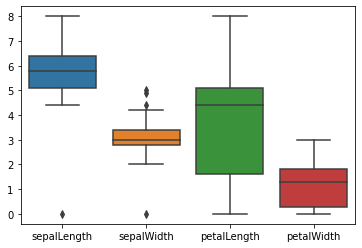

In [11]:
stats_df = df.drop(['species'], axis=1)
 
### Formamos Dataframe stats_df quitando lo indicado
    
sns.boxplot(data=stats_df)

### Formamos grafico box-plot

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

La columna **label** etiquetará con 1 y 0, 0 los que no cumplan los rangos y 1 los que si.

In [12]:
#Rango de sepalLength
mask_sepalL_inf =  df['sepalLength'] >= 4.0
mask_sepalL_sup =  df['sepalLength'] <= 7.0

#Rango de sepalWidth
mask_sepalW_inf =  df['sepalWidth'] >= 2.0
mask_sepalW_sup =  df['sepalWidth'] <= 4.5   

#Rango de petalLength
mask_petalL_inf =  df['petalLength'] >= 1.0
mask_petalL_sup =  df['petalLength'] <= 7.0

#Rango de petalWidth
mask_petalW_inf =  df['petalWidth'] >= 0.1
mask_petalW_sup =  df['petalWidth'] <= 2.5

#Ordenamos mask por columna
mask_sepalL = mask_sepalL_inf & mask_sepalL_sup
mask_sepalW = mask_sepalW_inf & mask_sepalW_sup
mask_petalL = mask_petalL_inf & mask_petalL_sup
mask_petalW = mask_petalW_inf & mask_petalW_sup

#Ordenamos mask de label dentro de rango
mask_label = mask_sepalL & mask_sepalW & mask_petalL & mask_petalW

#Agregamos columna label con todos igual a 0
df['label'] = 0

#data que cumple con los rangos
df_aux = df[mask_label]
df_aux['label'] = 1

#Actualiza los que cumplen con el dataframe original
for i in df.index:
    if i in df_aux.index:
        df['label'][i] = 1
df.head(13)

/home/pablo/anaconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/pablo/anaconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,0
1,7.2,3.6,6.1,2.5,virginica,0
2,6.3,3.3,6.0,2.5,virginica,1
3,6.7,3.3,5.7,2.5,virginica,1
4,6.3,3.4,5.6,2.4,virginica,1
5,6.7,3.1,5.6,2.4,virginica,1
6,5.8,2.8,5.1,2.4,virginica,1
7,6.2,3.4,5.4,2.3,virginica,1
8,6.7,3.0,5.2,2.3,virginica,1
9,6.8,3.2,5.9,2.3,virginica,1


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

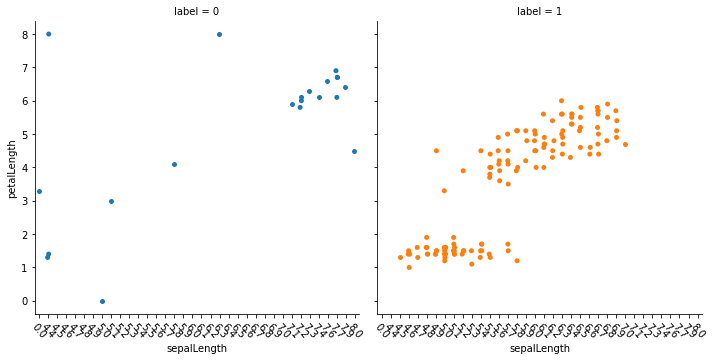

In [13]:
#Se realiza grafico de dispersión

grafico = sns.catplot(x = 'sepalLength', 
                   y = 'petalLength', 
                   data = df, 
                   hue = 'label',  
                   col = 'label',  
                   kind = 'strip') 
 
grafico.set_xticklabels(rotation=-50)

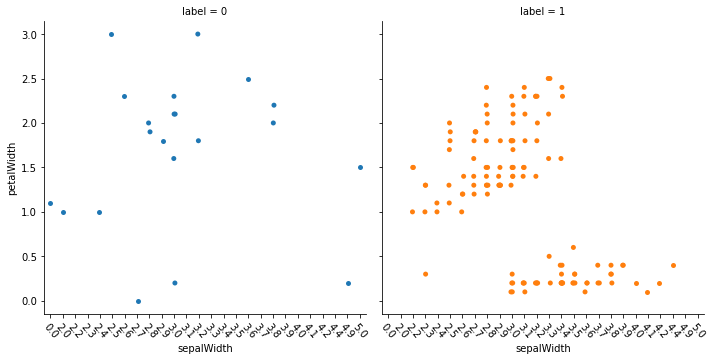

In [14]:
#Se realiza grafico de dispersión

grafico = sns.catplot(x = 'sepalWidth', 
                   y = 'petalWidth', 
                   data = df, 
                   hue = 'label',  
                   col = 'label',  
                   kind = 'strip') 
 
grafico.set_xticklabels(rotation = -50)

Se puede notar claramente que los gráficos tanto de *sepalLenght vs petalLenght* y *sepalWidth vs petalWidth*, cuando no están dentro de los rangos establecidos, se encuentran más dispersos, por lo que se pueden considerar como anormalidades en la iris, o que en ciertos casos del dataset se anotaron erroneamente los valores.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

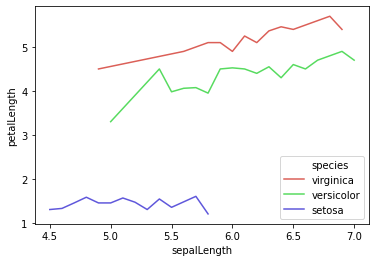

In [15]:
# Tenemos los datos que cumplen los rangos
df = df_aux

palette = sns.color_palette("hls", 3)

sns.lineplot(
    x = 'sepalLength',
    y = 'petalLength',
    hue = 'species',# color por specie
    data = df,
    ci = None,
    palette = palette
)